In [57]:
#       _ _,---._
#    ,-','       `-.___
#   /-;'               `._
#  /\/          ._   _,'o \
# ( /\       _,--'\,','"`. )
#  |\      ,'o     \'    //\
#  |      \        /   ,--'""`-.
#  :       \_    _/ ,-'         `-._
#   \        `--'  /                )
#    `.  \`._    ,'     ________,','
#      .--`     ,'  ,--` __\___,;'
#       \`.,-- ,' ,`_)--'  /`.,'
#        \( ;  | | )      (`-/
#          `--'| |)       |-/
#            | | |        | |
#            | | |,.,-.   | |_
#            | `./ /   )---`  )
#           _|  /    ,',   ,-'
#  -hrr-   ,'|_(    /-<._,' |--,
#          |    `--'---.     \/ \
#          |          / \    /\  \
#        ,-^---._     |  \  /  \  \
#     ,-'        \----'   \/    \--`.
#    /            \              \   \
#######################################
#                Gruy                 #                  
#######################################

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

CSV

In [2]:
train = r"E:/Cours_Simplon/data_scientist/Machine_learning/regression_lineaire/50_Startups.csv"
df_train = pd.read_csv(train, sep=",")
print(df_train.shape)
df_train.head()

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Transformation variable catégorielles en variable numériques

In [3]:
col_quant = pd.get_dummies(df_train['State'])
col_quant.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [4]:
df_train1 = pd.concat([df_train, col_quant], axis=1)
df_train1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [5]:
print(df_train1.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
California         0
Florida            0
New York           0
dtype: int64


### Choix des features

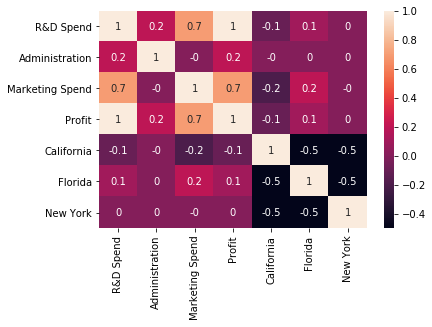

In [6]:
matrice_corr = df_train1.corr().round(1)
sns.heatmap(data=matrice_corr,annot=True)

### Division du data set pour training 2 Features

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train1['R&D Spend'] = pd.Categorical(df_train1['R&D Spend']).codes
df_train1['Marketing Spend'] = pd.Categorical(df_train1['Marketing Spend']).codes

features = df_train1.drop(['Administration',"Florida","California", "New York", "State", "Profit"], axis = 1)
target = df_train1['Profit']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=5)

### Creation objet regression lineaire

In [9]:
regr = linear_model.LinearRegression()

### Entrainement Modele 2 Features

In [10]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prédiction sur l'ensemble du test

In [11]:
train_y_pred = regr.predict(X_test)

### Calcul Mean Absolute Error (MAE)

In [12]:
from sklearn.metrics import mean_absolute_error

In [13]:
print("Mean Absolute Error:", mean_absolute_error(y_test, train_y_pred))
### MAE correspond erreur moyen sur le profit

Mean Absolute Error: 8023.745247336291


### Calcul Mean Squared Error (MSE)

In [14]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error: ", mean_squared_error(y_test, train_y_pred))

mean_squared_error:  112338016.93843651


### Calcul Root Mean Quare Error (RMSE)

In [15]:
import math
mse = mean_absolute_error(y_test, train_y_pred)
rmse = math.sqrt(mse)
print("Root Mean Quare Erro: ",rmse)

Root Mean Quare Erro:  89.57536071563592


### Calcul R²

In [20]:
r2 = r2_score(y_test, train_y_pred)
print("R² :", r2)

R² : 0.9289695383493689


### Calcul R2 adjuster

In [21]:
r2_adj = 1-(1-r2_1)*(len(train_y_pred)-1)/(len(train_y_pred)-len(y_test)-1)
print(r2_adj)

1.6392741548556797


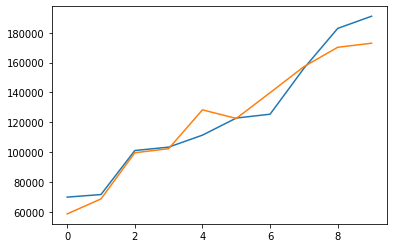

In [22]:
to_plot = pd.DataFrame([[y_test.to_numpy()[i], train_y_pred[i]] for i in range(len(y_test))], columns = ['test', 'pred'])
to_plot = to_plot.sort_values('test')  
plt.plot(list(range(len(to_plot))), to_plot['test'])
plt.plot(list(range(len(to_plot))), to_plot['pred'])
plt.show()